In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/Anasuya-Sahoo/DMDW-Lab/main/student-mat.csv"
data = pd.read_csv(url)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## 1. Evaluate the covariance and correlation of by using any two columns

In [3]:
df = data[['traveltime','studytime']]
df.head()

,traveltime,studytime
0,2,2
1,1,2
2,1,2
3,1,3
4,1,2


In [4]:
covariance = df.cov()
covariance

,traveltime,studytime
traveltime,0.486513,-0.059070
studytime,-0.059070,0.704324


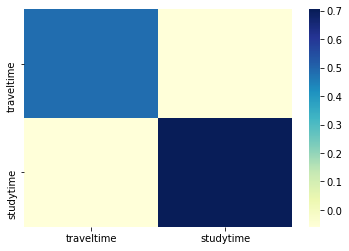

In [5]:
sns.heatmap(covariance,cmap ='YlGnBu')
plt.show()

In [6]:
correlation = df.corr()
correlation

,traveltime,studytime
traveltime,1.000000,-0.100909
studytime,-0.100909,1.000000


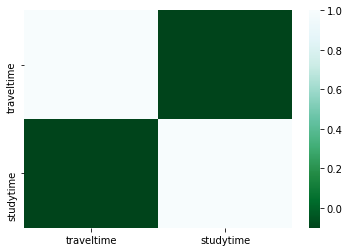

In [7]:
sns.heatmap(correlation,cmap='BuGn_r')
plt.show()

## 2. Implement chi square test

In [8]:
dfnom = data[['Mjob','Fjob']]
dfnom.head()

,Mjob,Fjob
0,at_home,teacher
1,at_home,other
2,at_home,other
3,health,services
4,other,other


In [9]:
dfnom = dfnom.replace('at_home','home')
dfnom.astype('category')
dfnom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    395 non-null    object
 1   Fjob    395 non-null    object
dtypes: object(2)
memory usage: 6.3+ KB


In [10]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [11]:
dfnom['Mjob'] = lb.fit_transform(dfnom['Mjob'])
dfnom['Fjob'] = lb.fit_transform(dfnom['Fjob'])
dfnom = np.array(dfnom)

In [12]:
dfnom=dfnom[dfnom!=0]

In [13]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(dfnom)

In [14]:
stat

0.0

In [15]:
p

1.0

In [16]:
dof

0

In [17]:
expected

array([1., 4., 1., 2., 1., 2., 3., 2., 2., 3., 2., 2., 2., 2., 4., 3., 2.,
       2., 2., 4., 3., 2., 3., 4., 2., 2., 2., 2., 3., 3., 2., 2., 3., 3.,
       2., 4., 2., 4., 2., 2., 2., 3., 3., 3., 2., 2., 3., 3., 2., 4., 4.,
       3., 3., 3., 4., 1., 2., 2., 2., 2., 2., 2., 4., 3., 2., 4., 3., 1.,
       2., 2., 2., 4., 2., 3., 4., 3., 3., 2., 1., 2., 2., 2., 3., 3., 4.,
       2., 3., 4., 3., 3., 2., 3., 3., 2., 2., 2., 2., 3., 3., 4., 2., 1.,
       3., 2., 4., 3., 3., 2., 3., 4., 3., 3., 4., 3., 2., 3., 3., 2., 3.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 4., 2., 4., 2., 2.,
       2., 2., 2., 1., 2., 2., 3., 2., 2., 3., 2., 3., 3., 2., 2., 3., 3.,
       1., 2., 2., 2., 3., 2., 4., 2., 2., 3., 2., 2., 2., 4., 3., 3., 1.,
       2., 3., 2., 2., 2., 2., 2., 2., 1., 3., 3., 3., 4., 3., 2., 3., 2.,
       3., 2., 2., 2., 2., 3., 2., 2., 2., 4., 4., 3., 2., 1., 2., 4., 2.,
       3., 4., 4., 2., 4., 2., 3., 2., 2., 2., 2., 1., 3., 3., 3., 2., 2.,
       2., 2., 3., 3., 2.

In [18]:
expected.shape

(738,)

## 3. Implement different types of normalization

In [19]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [20]:
age=np.array(data['age'])
print('MAX AGE',max(age))
print('MIN AGE',min(age))
age=age.reshape(395,1)

MAX AGE 22
MIN AGE 15


In [21]:
from scipy import stats
zscore = np.array(stats.zscore(age))
zscore = zscore[0:394]
zscore = zscore.reshape(2,197)
zscore

array([[ 1.02304645,  0.23837976, -1.33095364, -1.33095364, -0.54628694,
        -0.54628694, -0.54628694,  0.23837976, -1.33095364, -1.33095364,
        -1.33095364, -1.33095364, -1.33095364, -1.33095364, -1.33095364,
        -0.54628694, -0.54628694, -0.54628694,  0.23837976, -0.54628694,
        -1.33095364, -1.33095364, -0.54628694, -0.54628694, -1.33095364,
        -0.54628694, -1.33095364, -1.33095364, -0.54628694, -0.54628694,
        -1.33095364, -1.33095364, -1.33095364, -1.33095364, -0.54628694,
        -1.33095364, -1.33095364, -0.54628694, -1.33095364, -1.33095364,
        -0.54628694, -1.33095364, -1.33095364, -1.33095364, -0.54628694,
        -1.33095364, -0.54628694, -0.54628694, -1.33095364, -1.33095364,
        -0.54628694, -1.33095364, -1.33095364, -1.33095364, -1.33095364,
        -0.54628694, -1.33095364, -1.33095364, -1.33095364, -0.54628694,
        -0.54628694, -0.54628694, -0.54628694, -0.54628694, -1.33095364,
        -0.54628694, -1.33095364, -0.54628694, -1.3

In [22]:
result = []
result.append(age/pow(10,2))
result = np.array(result)
result

array([[[0.18],
        [0.17],
        [0.15],
        [0.15],
        [0.16],
        [0.16],
        [0.16],
        [0.17],
        [0.15],
        [0.15],
        [0.15],
        [0.15],
        [0.15],
        [0.15],
        [0.15],
        [0.16],
        [0.16],
        [0.16],
        [0.17],
        [0.16],
        [0.15],
        [0.15],
        [0.16],
        [0.16],
        [0.15],
        [0.16],
        [0.15],
        [0.15],
        [0.16],
        [0.16],
        [0.15],
        [0.15],
        [0.15],
        [0.15],
        [0.16],
        [0.15],
        [0.15],
        [0.16],
        [0.15],
        [0.15],
        [0.16],
        [0.15],
        [0.15],
        [0.15],
        [0.16],
        [0.15],
        [0.16],
        [0.16],
        [0.15],
        [0.15],
        [0.16],
        [0.15],
        [0.15],
        [0.15],
        [0.15],
        [0.16],
        [0.15],
        [0.15],
        [0.15],
        [0.16],
        [0.16],
        [0.16],
        